In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics

In [2]:
dataset= pd.read_csv("/Users/vinay/Downloads/softsensor_aiprojectassignment/Data_problem_1.csv")

In [3]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
dataset.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
dataset.shape

(8950, 18)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
dataset.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
dataset=dataset.dropna(subset=['CREDIT_LIMIT'])

In [10]:
dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [11]:
dataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
dataset['AVERAGE_PURCHASE']=dataset['PURCHASES']/dataset['TENURE']
dataset['MONTHLY_CASH_ADVANCE']=dataset['CASH_ADVANCE']/dataset['TENURE']

In [13]:
dataset[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [14]:
def func1(dataset):
    if (dataset['ONEOFF_PURCHASES']==0) & (dataset['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (dataset['ONEOFF_PURCHASES']>0) & (dataset['INSTALLMENTS_PURCHASES']>0):
         return 'both_one_off_installment'
    if (dataset['ONEOFF_PURCHASES']>0) & (dataset['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (dataset['ONEOFF_PURCHASES']==0) & (dataset['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [15]:
dataset['PURCHASE_TYPE']=dataset.apply(func1,axis=1)

In [16]:
dataset['LIMIT_USAGE']=dataset['BALANCE']/dataset['CREDIT_LIMIT']

In [17]:
dataset['MINIMUM']=dataset['PAYMENTS']/dataset['MINIMUM_PAYMENTS']

In [18]:
def outlierhandling(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.05))
    return x

In [20]:
new_dataset=dataset.drop(['CUST_ID','PURCHASE_TYPE'],axis=1).apply(lambda x:outlierhandling(x))

In [21]:
words=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
dataset2=new_dataset[[x for x in new_dataset.columns if x not in words ]]

In [22]:
x=dataset.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MINIMUM']))

Text(0.5, 1.0, 'Mean of Minimum payment ratio for each purchase type')

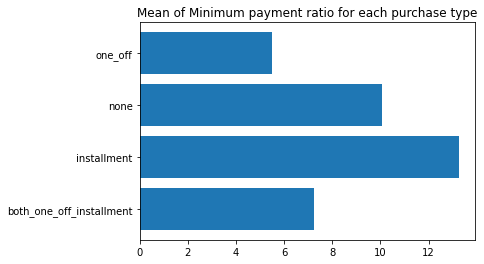

In [23]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean of Minimum payment ratio for each purchase type')

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchases')

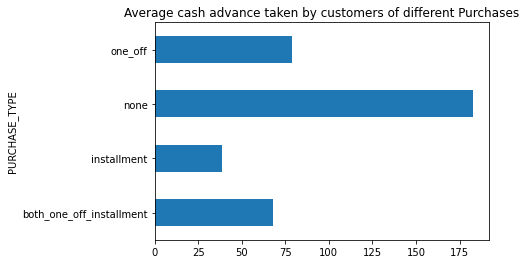

In [24]:
dataset.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_CASH_ADVANCE'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchases')

In [31]:
dataset_dummy=pd.concat([dataset2,pd.get_dummies(dataset['PURCHASE_TYPE'])],axis=1)

In [33]:
dataset_dummy

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,AVERAGE_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,MINIMUM,both_one_off_installment,installment,none,one_off
0,0.818182,0.00,95.40,0.166667,0.000000,0.083333,0.000000,0.0,2.0,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,0.909091,0.00,0.00,0.000000,0.000000,0.000000,0.250000,4.0,0.0,0.000000,425.558626,0.457495,3.826241,0,0,1,0
2,1.000000,773.17,0.00,1.000000,1.000000,0.000000,0.000000,0.0,12.0,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,0.636364,1499.00,0.00,0.083333,0.083333,0.000000,0.083333,1.0,1.0,124.916667,17.149001,0.222223,0.257293,0,0,0,1
4,1.000000,16.00,0.00,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1.333333,0.000000,0.681429,2.771075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.000000,0.00,291.12,1.000000,0.000000,0.833333,0.000000,0.0,6.0,48.520000,0.000000,0.028494,6.660231,0,1,0,0
8946,1.000000,0.00,300.00,1.000000,0.000000,0.833333,0.000000,0.0,6.0,50.000000,0.000000,0.019183,0.319171,0,1,0,0
8947,0.833333,0.00,144.40,0.833333,0.000000,0.666667,0.000000,0.0,5.0,24.066667,0.000000,0.023399,0.986076,0,1,0,0
8948,0.833333,0.00,0.00,0.000000,0.000000,0.000000,0.166667,2.0,0.0,0.000000,6.093130,0.026915,0.942505,0,0,1,0


<AxesSubplot:>

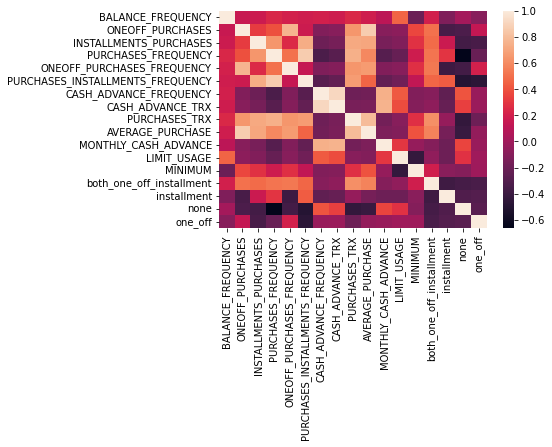

In [34]:
sns.heatmap(dataset_dummy.corr())

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_scaled=sc.fit_transform(dataset_dummy)

In [37]:
from sklearn.decomposition import PCA

In [45]:
pca=PCA(n_components=17)
dataset_pca=pca.fit(dataset_scaled)

In [46]:
pca.explained_variance_ 

array([5.94301768e+00, 3.06510519e+00, 2.23126828e+00, 1.43860661e+00,
       1.14088252e+00, 7.21914160e-01, 5.43174134e-01, 4.77103064e-01,
       3.62021864e-01, 3.13525428e-01, 2.91869617e-01, 1.86239959e-01,
       1.42666690e-01, 8.09099976e-02, 4.01761679e-02, 2.34185117e-02,
       1.02269651e-31])

In [47]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_ , decimals=4)*100)
var1

array([ 34.96,  52.99,  66.11,  74.57,  81.28,  85.53,  88.72,  91.53,
        93.66,  95.5 ,  97.22,  98.32,  99.16,  99.64,  99.88, 100.02,
       100.02])

In [48]:
pca=PCA(n_components=6)

In [50]:
pc=pca.fit(dataset_scaled)

In [51]:
var2 = np.cumsum(np.round(pc.explained_variance_ratio_ , decimals=4)*100)
var2

array([34.96, 52.99, 66.11, 74.57, 81.28, 85.53])

<AxesSubplot:>

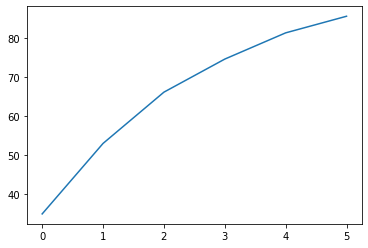

In [52]:
pd.Series(var2).plot()

In [54]:
pca_final=PCA(n_components=6).fit(dataset_scaled)
reduced_dataset = pca_final.fit_transform(dataset_scaled)

In [55]:
final = pd.DataFrame(reduced_dataset)
final.columns = ["C1", "C2", "C3", "C4", "C5","C6"]

In [56]:
final

,C1,C2,C3,C4,C5,C6
0,-1.061124,-2.452018,-0.235878,-0.029152,0.211729,0.010646
1,-3.179464,1.405526,-0.443077,1.108629,-0.565961,0.299621
2,0.861215,0.025881,2.499690,-2.057602,1.049532,-0.098261
3,-0.766712,-0.540220,2.636606,-0.498025,0.811793,0.017923
4,-1.603093,-0.784324,1.585089,-1.860812,0.328149,0.354074
...,...,...,...,...,...,...
8944,0.813473,-2.326269,-1.411167,0.078034,0.707653,0.434143
8945,0.651170,-2.346443,-1.640484,-0.548512,0.706782,0.020615
8946,0.130006,-2.568958,-1.162324,-0.164810,0.652216,-0.242064
8947,-2.380681,-0.685383,0.415803,0.497919,-1.570074,0.022477


In [57]:
from sklearn.cluster import KMeans
km_3 = KMeans(n_clusters=3, random_state=123)
km_3.fit(final)

KMeans(n_clusters=3, random_state=123)

In [58]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(final)
km_5 = KMeans(n_clusters=5, random_state=123).fit(final)
km_6 = KMeans(n_clusters=6, random_state=123).fit(final)
km_7 = KMeans(n_clusters=7, random_state=123).fit(final)
km_8 = KMeans(n_clusters=8, random_state=123).fit(final)

In [59]:
dataset2['cluster_3'] = km_3.labels_
dataset2['cluster_4'] = km_4.labels_
dataset2['cluster_5'] = km_5.labels_
dataset2['cluster_6'] = km_6.labels_
dataset2['cluster_7'] = km_7.labels_
dataset2['cluster_8'] = km_8.labels_

/var/folders/7s/lp33t79d1pg373zvzzwqsfym0000gn/T/ipykernel_1724/2222099544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['cluster_3'] = km_3.labels_
/var/folders/7s/lp33t79d1pg373zvzzwqsfym0000gn/T/ipykernel_1724/2222099544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['cluster_4'] = km_4.labels_
/var/folders/7s/lp33t79d1pg373zvzzwqsfym0000gn/T/ipykernel_1724/2222099544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [60]:
dataset2['cluster_3'].value_counts()/sum(dataset2['cluster_3'].value_counts())
dataset2['cluster_4'].value_counts()/sum(dataset2['cluster_4'].value_counts())
dataset2['cluster_5'].value_counts()/sum(dataset2['cluster_5'].value_counts())
dataset2['cluster_6'].value_counts()/sum(dataset2['cluster_6'].value_counts())
dataset2['cluster_7'].value_counts()/sum(dataset2['cluster_7'].value_counts())
dataset2['cluster_8'].value_counts()/sum(dataset2['cluster_8'].value_counts())

4    0.206839
1    0.153872
3    0.146050
0    0.138563
6    0.108169
5    0.102358
2    0.092189
7    0.051961
Name: cluster_8, dtype: float64

In [63]:
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_dataset)
    scores.append(metrics.silhouette_score(reduced_dataset, km.labels_))

In [64]:
scores

[0.26445068036886976,
 0.2855008873055615,
 0.3351783414497778,
 0.3550729631762491,
 0.3554780097887902,
 0.34325056604603316,
 0.34533284159342953,
 0.34962559018408,
 0.3417674211557187,
 0.3276971044350804,
 0.32770621927450516,
 0.3397995678837914,
 0.3486891860738995,
 0.3465504352935437,
 0.3403916348709052,
 0.3452414013182863,
 0.3266436901886295,
 0.32491623984530077,
 0.3204692733517774]

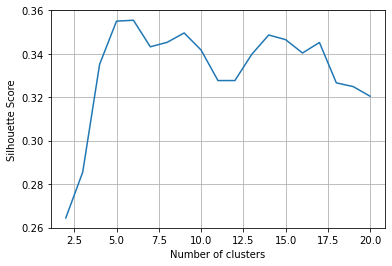

In [65]:
plt.plot( k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid('True')

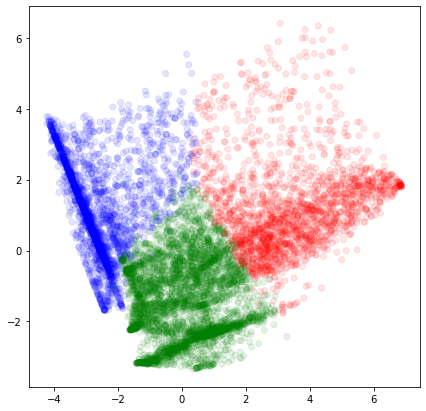

In [68]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_3.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_dataset[:,0],reduced_dataset[:,1],c=label_color,cmap='Spectral',alpha=0.1)

In [69]:
cluster_range= range(2, 20)
errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(final)
    errors.append(clusters.inertia_)

In [70]:
errors

[93765.97732935332,
 71949.41782359741,
 57952.02603133755,
 49346.58151179656,
 42493.2124197322,
 38948.353807528016,
 35373.51794684011,
 32953.89018719305,
 30957.77159751985,
 28777.604648714092,
 27108.84322770114,
 24732.47691224896,
 23694.426754679145,
 22305.67552521403,
 21047.465801433464,
 20119.379037806008,
 19286.506406240136,
 18564.7007976246]

In [72]:
clusters_dataset = pd.DataFrame({'Cluster_no' : range(2, 20), 'Unexpalined_variance' : errors})
clusters_dataset[0:10]

,Cluster_no,Unexpalined_variance
0,2,93765.977329
1,3,71949.417824
2,4,57952.026031
3,5,49346.581512
4,6,42493.212420
5,7,38948.353808
6,8,35373.517947
7,9,32953.890187
8,10,30957.771598
9,11,28777.604649


In [75]:
total = pd.concat([pd.Series(dataset2.cluster_3.size), pd.Series(dataset2.cluster_3.value_counts()).sort_index(), pd.Series(dataset2.cluster_4.value_counts()).sort_index(),
          pd.Series(dataset2.cluster_5.value_counts()).sort_index(), pd.Series(dataset2.cluster_6.value_counts()).sort_index(), pd.Series(dataset2.cluster_7.value_counts()).sort_index(),
          pd.Series(dataset2.cluster_8.value_counts()).sort_index()])

In [78]:
Seg_size = pd.DataFrame(total, columns=['seg_size'])
Seg_pct = pd.DataFrame(total/dataset2.cluster_3.size, columns= ['Seg_pct'])

In [76]:
Profiling_output = pd.concat([dataset2.apply(lambda x: x.mean()).T, dataset2.groupby('cluster_3').apply(lambda x : x.mean()).T,
                             dataset2.groupby('cluster_4').apply(lambda x : x.mean()).T, dataset2.groupby('cluster_5').apply(lambda x : x.mean()).T, 
                             dataset2.groupby('cluster_6').apply(lambda x : x.mean()).T, dataset2.groupby('cluster_7').apply(lambda x : x.mean()).T,
                             dataset2.groupby('cluster_8').apply(lambda x : x.mean()).T], axis =1)

In [79]:
Profiling_output_final=pd.concat([Seg_size.T, Seg_pct.T, Profiling_output], axis=0)
Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8']

In [80]:
Profiling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
seg_size,8949.000000,1989.000000,2857.000000,4103.000000,1733.000000,1931.000000,2520.000000,2765.000000,1684.000000,2170.000000,...,921.000000,1238.000000,1240.000000,1377.000000,825.000000,1307.000000,1851.000000,916.000000,968.000000,465.000000
Seg_pct,1.000000,0.222259,0.319254,0.458487,0.193653,0.215778,0.281596,0.308973,0.188177,0.242485,...,0.102917,0.138339,0.138563,0.153872,0.092189,0.146050,0.206839,0.102358,0.108169,0.051961
BALANCE_FREQUENCY,0.883320,0.972386,0.908197,0.822822,0.828181,0.972135,0.904251,0.836777,0.828188,0.828486,...,0.378172,0.945205,0.946358,0.949465,0.948673,0.948326,0.895687,0.377606,0.975653,0.975445
ONEOFF_PURCHASES,448.020512,1416.774653,93.250816,225.433390,646.009221,1368.197760,45.993079,47.706745,634.913695,0.000000,...,184.477262,708.430777,690.034198,519.942625,88.240642,0.053213,0.000000,185.974823,1921.006996,720.379299
INSTALLMENTS_PURCHASES,336.390269,873.137099,31.092356,288.777960,2.950831,885.252750,27.836853,443.280579,0.000000,485.636171,...,72.315212,0.000000,0.000000,449.950327,11.075576,0.548906,527.916753,70.002882,1099.022872,593.052602
PURCHASES_FREQUENCY,0.490405,0.908311,0.095852,0.562554,0.325447,0.904808,0.069325,0.688157,0.321056,0.708895,...,0.168328,0.371110,0.367450,0.736842,0.070695,0.001211,0.771689,0.164413,0.946396,0.781400
ONEOFF_PURCHASES_FREQUENCY,0.202480,0.572552,0.051462,0.128239,0.323002,0.565718,0.028067,0.032226,0.320858,0.000000,...,0.069260,0.370841,0.367181,0.307376,0.049899,0.000064,0.000000,0.069389,0.698410,0.328093
PURCHASES_INSTALLMENTS_FREQUENCY,0.364478,0.699399,0.045474,0.424248,0.004512,0.718247,0.042582,0.636403,0.000000,0.672835,...,0.092942,0.000000,0.000000,0.569422,0.018102,0.001084,0.735396,0.088791,0.759369,0.610000
CASH_ADVANCE_FREQUENCY,0.127633,0.086525,0.296751,0.029801,0.078602,0.090741,0.293367,0.033080,0.086858,0.034902,...,0.040622,0.077242,0.081271,0.045339,0.466204,0.192177,0.029580,0.041026,0.043308,0.449314
CASH_ADVANCE_TRX,2.731925,1.901961,6.494575,0.514258,1.466821,2.002071,6.475794,0.622423,1.672209,0.673272,...,0.749186,1.326333,1.409677,0.794481,11.510303,3.346595,0.537007,0.764192,0.862603,11.197849


Following our initial profiling, we have determined that the 7 cluster option appears to be the best. For future
marketing strategy, below is a full summary of each cluster's characteristics. 

Cluster 0 consists of consumers with an average credit limit who use their credit cards mostly for one-time transactions. They favour card transactions over cash purchases. They might be targeted for special offers from various partner sources. 

Cluster 1 consists of clients who have a large credit limit and make a lot of purchases, both instalment and one-time. For these cardholders, the amount and quantity of transactions are relatively high. As a result, they have a very low balance.

Cluster 2 This cluster is designed for clients with a large balance and a low frequency of cash advances. This client sector, we may presume, utilises their credit cards as a borrowing facility. 

Cluster 3 This cluster consists of uninvolved consumers who use their cards seldom and only for modest transactions. As a result, despite having a big credit limit, they have minimal minimum payments. We may use several market methods, such as emi/installment purchases, to target them. 

Cluster 4 Customers in this cluster are comparable to cluster 2, except they have a smaller balance and credit limit. 

Cluster 5 These consumers make frequent purchases and make the most instalment purchases, while having a smaller rate of cash advances. They may not spend on other types of services since they have a limited credit limit. In addition, compared to other customers, they pay their bills on time. 

Cluster 6 These are clients that often utilise all services with large amounts of money, whether it's for purchases or cash transactions. They have the greatest credit limit as well as the smallest monthly payment. These are, in a nutshell, the consumers that are involved.